In [5]:
import pandas as pd
data_reviews = pd.read_csv('C:/Users/pankr/ML/text_for_ML.csv')
data_reviews = data_reviews.drop(columns=["id"])
data_reviews

,text,target
0,Мне очень понравился фильм «Танцуй до упаду». ...,1
1,"В первую очередь, хочу отметить, что это не пр...",1
2,"Ни одному слову, ни одному кадру верить нельзя...",0
3,Сценария нет — либо режиссёр полностью забыл с...,0
4,"Фильм оказался не лучше и не хуже того, что я ...",0
...,...,...
10937,"Прекрасный фильм, звучит так свежо, так чисто,...",1
10938,"Интересный, необычный фильм с моралью. В нем н...",1
10939,"Ребят, вы серьезно ставите эти десятки? Я поня...",0
10940,Замечательный сериал! Всем советую посмотреть....,1


<AxesSubplot:xlabel='target', ylabel='count'>

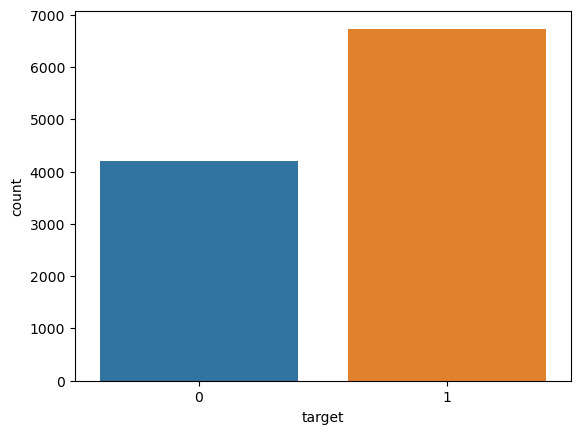

In [6]:
import seaborn as sns
sns.countplot(data=data_reviews, x="target")

In [7]:
import nltk
import re
from nltk.corpus import stopwords
lemmatize = nltk.WordNetLemmatizer()
import pymorphy2
from nltk.corpus import stopwords
morph = pymorphy2.MorphAnalyzer()
ru_stopwords = stopwords.words('russian')
new_text = []
print(len(data_reviews.text))
for i in data_reviews.text:
    #удаляем неалфавитные символы
    text = re.sub("[^a-zA-Zа-яА-Я]"," ",i) 
    
    # токенизируем слова
    text = nltk.word_tokenize(text,language = "russian")

    # лемматирзируем слова
    text = [morph.normal_forms(word) for word in text if (word not in ru_stopwords)]

    # соединяем слова
    strin = ""
    for i in text:
        for j in i:
            strin = strin + " " + j
    new_text.append(strin)

10942


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
# проводим преобразование текста
matrix = count.fit_transform(new_text).toarray()

matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
X=matrix
y = data_reviews["target"].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
result_logreg = logreg.fit(x_train, y_train)
logreg.score(x_test,y_test)

C:\Users\pankr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8652352672453175

In [11]:
def emotional_coloring(text):
    test_text_1 = re.sub("[^a-zA-Zа-яА-Я]"," ", text) 
    test_text_2 = nltk.word_tokenize(test_text_1,language = "russian")
    test_text_3 = [morph.normal_forms(word) for word in test_text_2 if (word not in ru_stopwords)]
    strin_2 = ""
    for i in test_text_3:
        for j in i:
            strin_2 = strin_2 + " " + j
    new_list = []
    new_list.append(strin_2)
    new = count.transform(new_list).toarray()
    result = logreg.predict(new)
    if result[0] == 0:
        return "злой текст:("
    elif result[0] == 1:
        return "добрый текст:)"

In [13]:
print(emotional_coloring(""))

злой текст:(


In [17]:
!pip install textblob

  Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)
  Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [ ]:
from flask import Flask, request, jsonify, render_template_string
from textblob import TextBlob  # Example for sentiment analysis (replace with your ML model)
app.run(debug=True, use_reloader=False)
app = Flask(__name__)

# Mock ML model function for sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Добрый"
    elif polarity < 0:
        return "Злой"
    else:
        return "Нейтральный"

# HTML template for user input
html_template = """
<!DOCTYPE html>
<html lang="ru">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sentiment Analysis</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background: url('https://xiengineering.com/wp-content/uploads/2023/10/AdobeStock_519767884-1-scaled.jpeg') no-repeat center center fixed;
            background-size: cover; /* Ensures the background covers the whole page */
            color: #333;
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
        }
        .container {
            background-color: rgba(255, 255, 255, 0.8); /* White background with some transparency */
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
            padding: 80px; /* Increased padding for bigger content */
            width: 80%;
            max-width: 750px;
        }
        h1 {
            color: #007BFF; /* Blue color for the title */
            font-size: 36px; /* Bigger font size for the title */
            margin-bottom: 20px;
            text-align: center;
        }
        label {
            font-size: 20px; /* Increased font size for label */
            margin-bottom: 10px;
            display: block;
        }
        textarea {
            width: 100%;
            height: 250px; /* Increased height of the textarea */
            padding: 12px;
            font-size: 18px;
            border-radius: 8px;
            border: 1px solid #ddd;
            resize: vertical;
            margin-bottom: 20px;
        }
        input[type="submit"] {
            padding: 14px 22px; /* Increased padding for the button */
            font-size: 20px; /* Bigger font size for the button */
            background-color: #007BFF; /* Blue button */
            color: white;
            border: none;
            border-radius: 5px;
            cursor: pointer;
            width: 100%;
        }
        input[type="submit"]:hover {
            background-color: #0056b3; /* Darker blue when hovering */
        }
        .result {
            background-color: rgba(0, 123, 255, 0.6); /* Semi-transparent blue background */
            border-radius: 8px;
            padding: 40px; /* Increased padding for result section */
            margin-top: 30px;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
        }
        .error {
            color: red;
            font-weight: bold;
            text-align: center;
            margin-top: 20px;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Sentiment Analysis</h1>
        <form action="/analyze" method="post">
            <label for="text">Введите текст:</label>
            <textarea id="text" name="text" placeholder="Введите текст для анализа..." required></textarea>
            <input type="submit" value="Анализировать">
        </form>

        {% if sentiment %}
            <div class="result">
                <h2>Результат:</h2>
                <p><strong>Текст:</strong> {{ text }}</p>
                <p><strong>Оценка:</strong> {{ sentiment }}</p>
            </div>
        {% endif %}

        {% if sentiment == "Error: No text provided" %}
            <p class="error">{{ sentiment }}</p>
        {% endif %}
    </div>
</body>
</html>
"""

# Default route redirects to analyze page
@app.route('/')
def home():
    return "<h1>Welcome!</h1><p>Go to <a href='/analyze'>Analyze Sentiment</a></p>"

# API endpoint to analyze sentiment
@app.route('/analyze', methods=['GET', 'POST'])
def analyze():
    if request.method == 'POST':
        user_text = request.form.get('text', '')
        if not user_text:
            return render_template_string(html_template, sentiment="Error: No text provided", text="")
        
        user_text_pr = str(user_text) 
        sentiment = emotional_coloring(user_text_pr)
        return render_template_string(html_template, sentiment=sentiment, text=user_text)
    return render_template_string(html_template)

# Run the app
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [24/Dec/2024 22:38:39] "GET /analyze HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2024 22:38:50] "POST /analyze HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2024 22:39:49] "POST /analyze HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2024 22:40:06] "POST /analyze HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2024 22:40:20] "POST /analyze HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2024 22:40:50] "POST /analyze HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2024 22:40:59] "POST /analyze HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2024 22:41:02] "POST /analyze HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2024 22:41:11] "POST /analyze HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2024 22:41:26] "POST /analyze HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2024 23:01:48] "POST /analyze HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2024 23:02:20] "POST /analyze HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2024 23:02:26] "POST /analyze HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2024 23:19:41] "POST /analyze HTTP/